# Prédiction du prix des maisons dans le comté de King 

## Contexte du projet

Ce projet vise à prédire le prix de vente des maisons dans le comté de King (État de Washington, USA) à l’aide de modèles de machine learning.
</br>Le dataset contient des données détaillées sur plus de 21 000 maisons vendues entre 2014 et 2015, avec des caractéristiques variées : taille, localisation, nombre de chambres, année de construction, etc.

L’objectif est d’entraîner un modèle de régression capable d’estimer précisément le prix d’une maison à partir de ses caractéristiques, afin de :

- Mieux comprendre les facteurs qui influencent le prix

- Aider les acheteurs, vendeurs ou agents immobiliers à prendre de meilleures décisions

#### Colonne	Description
- id : Identifiant unique de la maison
- date :	Date de la vente.
- bedrooms : Nombre de chambres.
- bathrooms	: Nombre de salles de bain.
- sqft_living : Surface habitable en pieds carrés (1 pied² ≈ 0,09 m²)
- sqft_lot : Surface totale du terrain en pieds carrés.
- floors	: Nombre d’étages (niveaux).
- waterfront :	Présence ou non d’un accès direct au bord de l’eau.
- view : 	Qualité de la vue depuis la maison.
- condition :	État général de la maison.
- grade: 	Qualité de la construction et du design intérieur.
- sqft_above	: Surface au-dessus du sol (hors sous-sol) en pieds carrés.
- sqft_basement	: Surface du sous-sol en pieds carrés.
- yr_built	: Année de construction de la maison.
- yr_renovated	: Année de la dernière rénovation.
- zipcode	: Code postal de la maison (sert à localiser le quartier).
- lat	: Latitude géographique.
- long	: Longitude géographique.
- sqft_living15	: Surface habitable moyenne des 15 maisons les plus proches.
- sqft_lot15 :	Surface moyenne du terrain des 15 maisons les plus proches.
- #### price : Prix de vente de la maison (variable cible).

#### Importation des Bibliothèques

In [306]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score,roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder



In [307]:
df = pd.read_csv('kc_house_data.csv')

## 1. Analyse exploratoire des données 

### 1.1.  Aperçu des données

#### Aperçu des premières lignes

In [311]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Aperçu des dernières lignes

In [313]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


#### Infos sur les types de données et les valeurs nulles

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Statistiques pour les colonnes numériques

In [317]:
df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


 ### 1.2. Vérifier les valeurs manquantes

#### Nombre de valeurs nulles par colonne

In [320]:
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Proportion de valeurs nulles

In [322]:
df.isnull().mean() 

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

 ### 1.3. Typologie des variables

In [324]:
# Colonnes catégorielles
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Colonnes numériques
num_cols = df.select_dtypes(include='number').columns


In [325]:
num_cols

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [326]:
cat_cols

Index(['date'], dtype='object')

 ### 1.4.  Analyse univariée (une variable à la fois)

#### Colonnes numériques

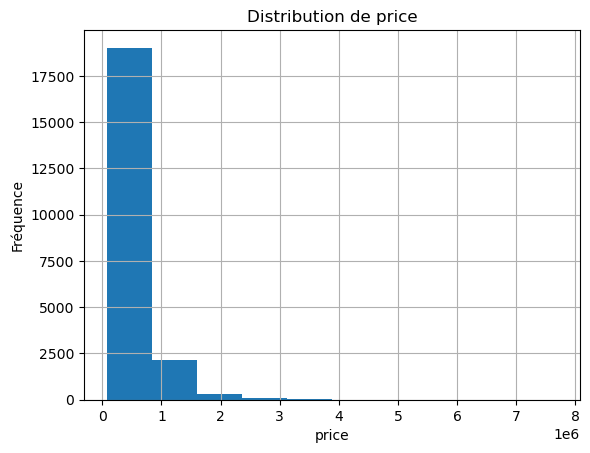

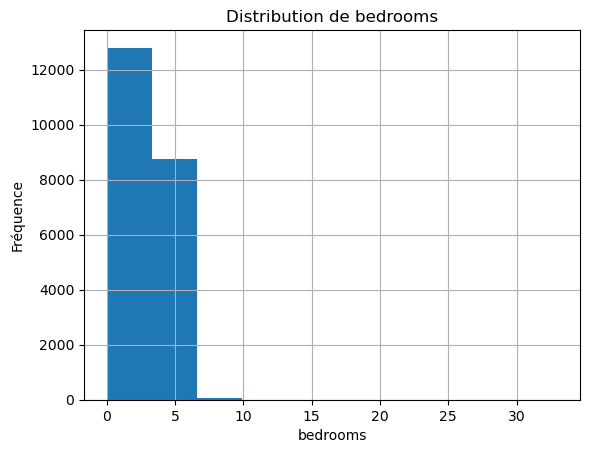

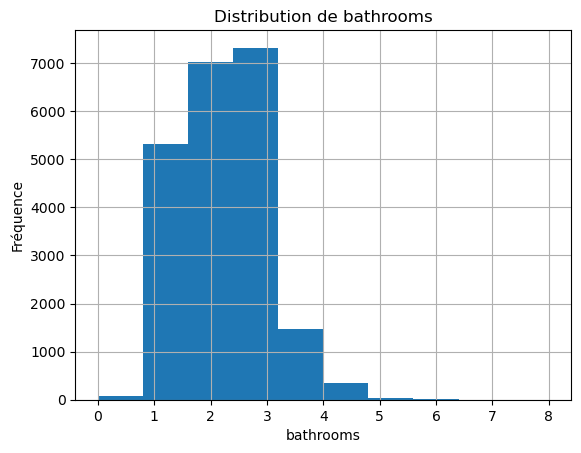

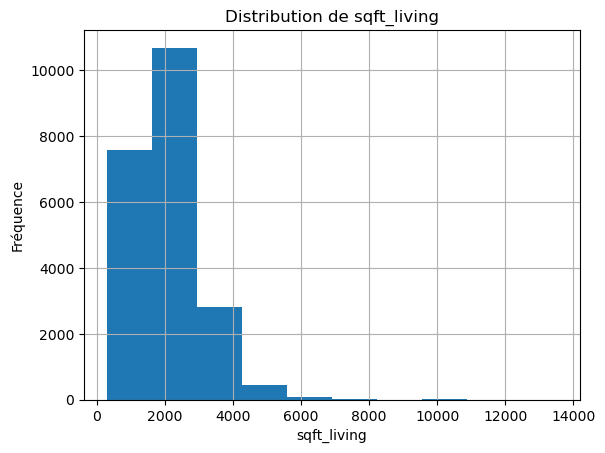

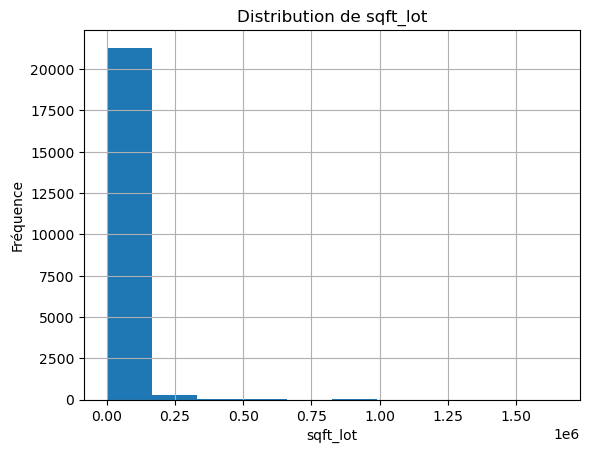

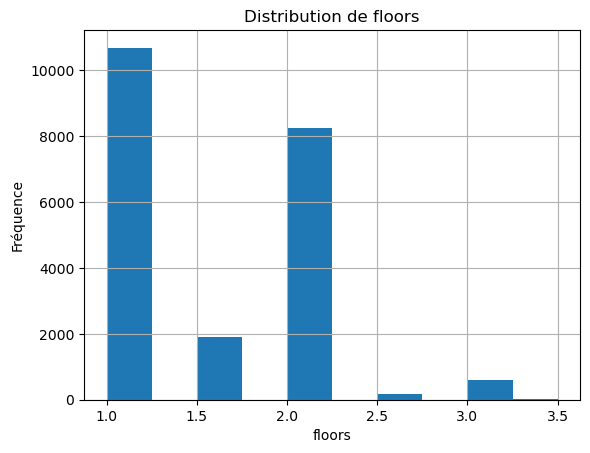

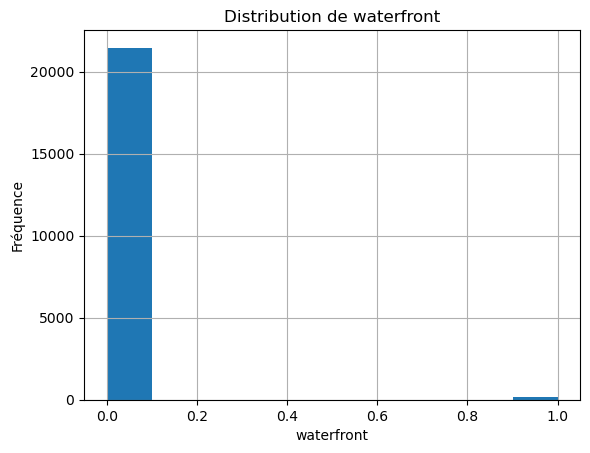

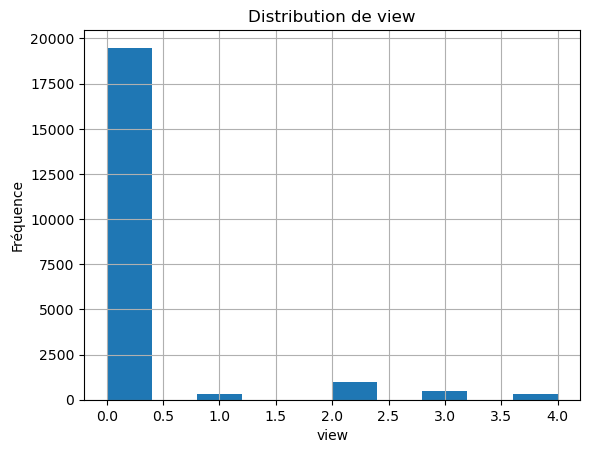

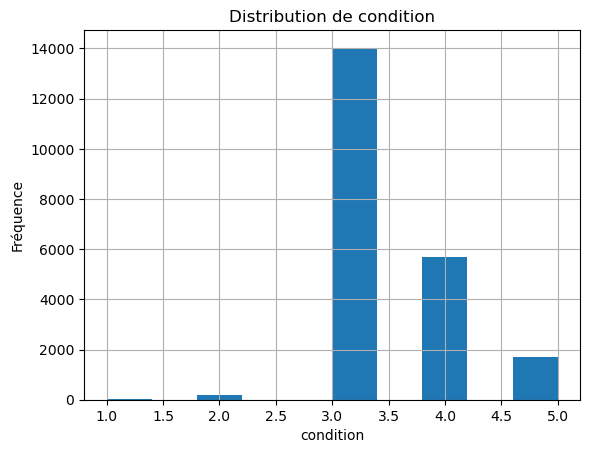

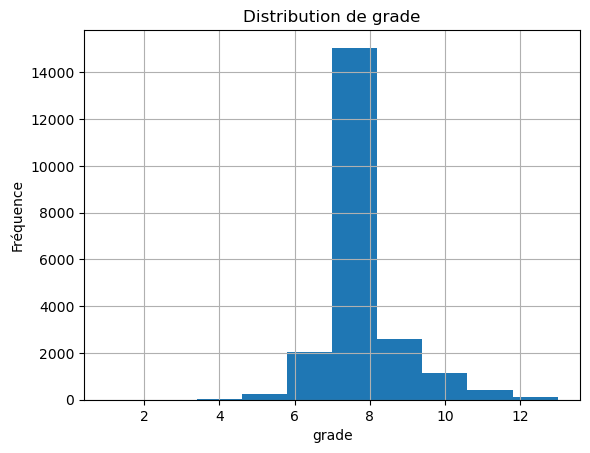

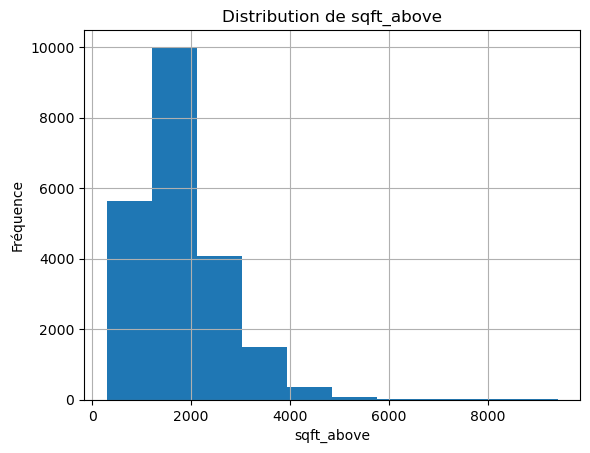

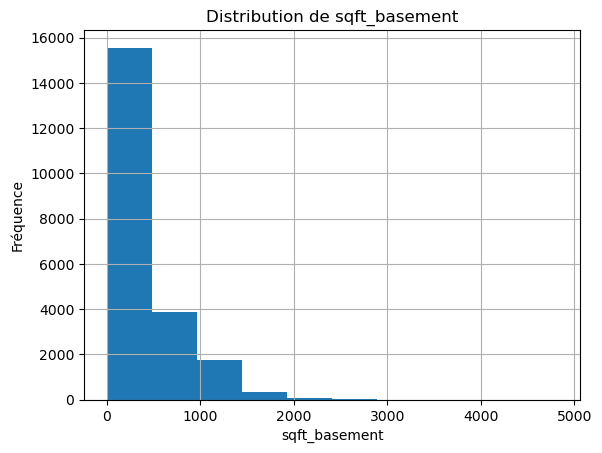

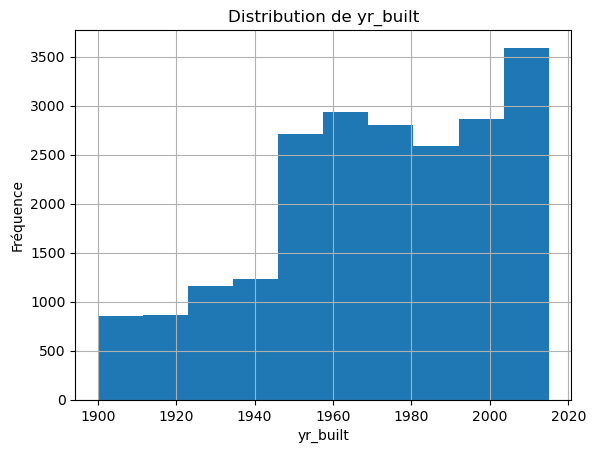

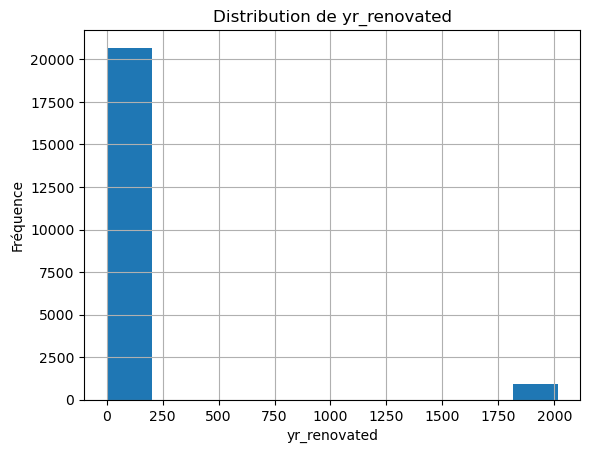

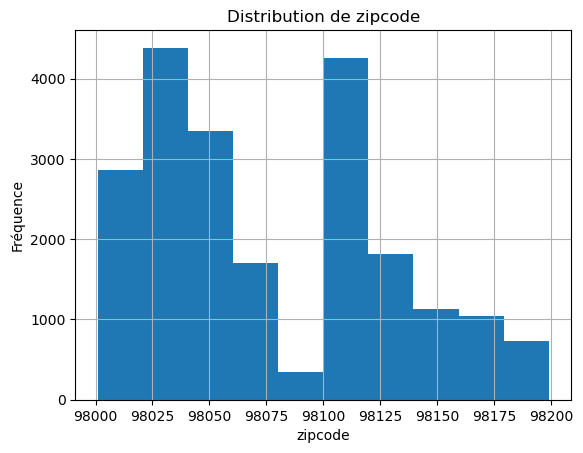

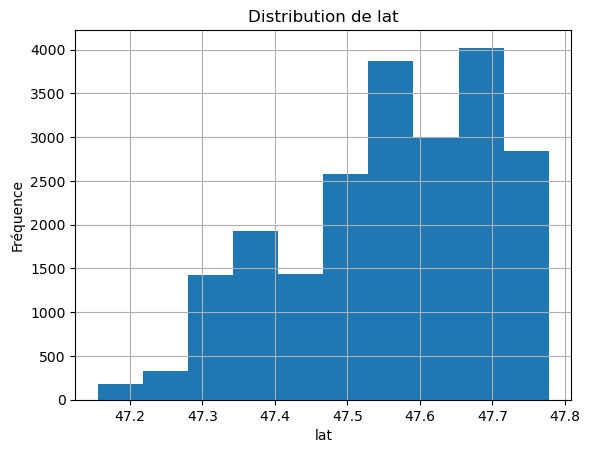

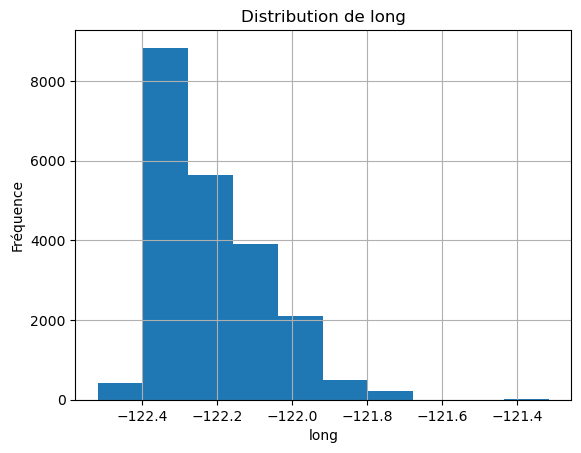

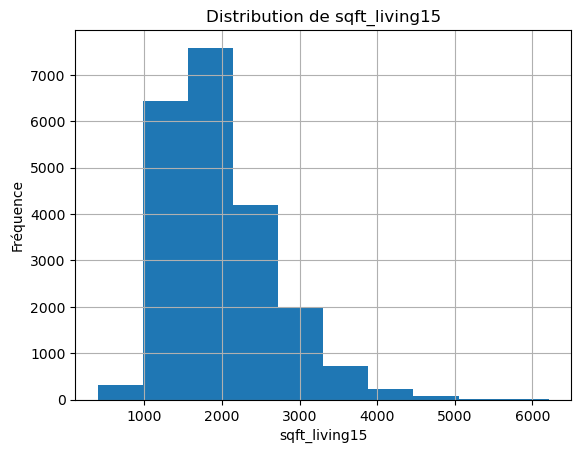

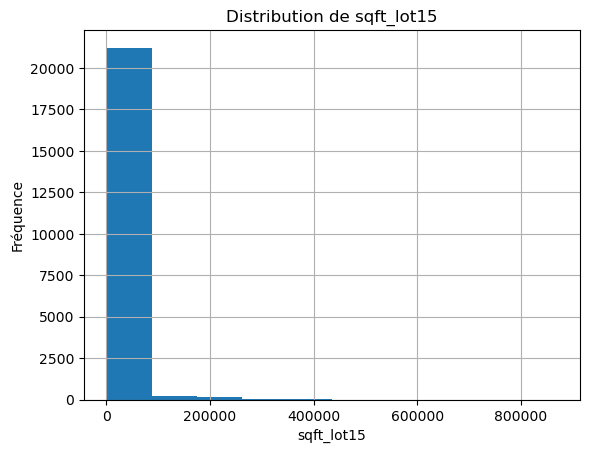

In [329]:
import matplotlib.pyplot as plt

for col in num_cols:
    if col not in ['id']:
        df[col].hist()
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.show()


#### Colonnes catégorielles

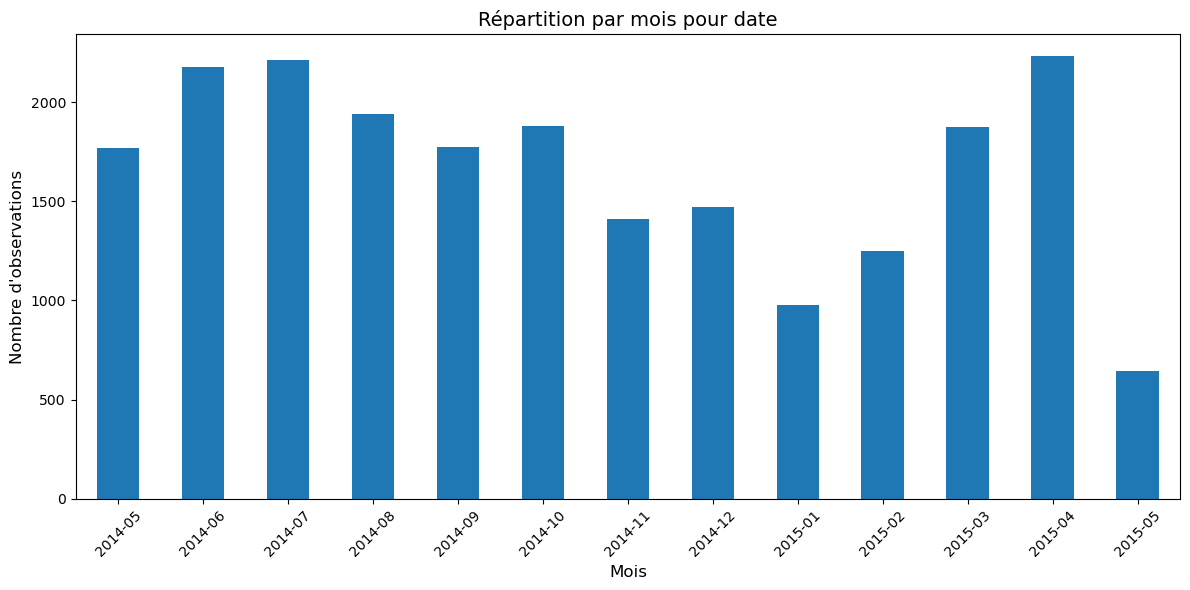

In [331]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Identifier les colonnes object
object_cols = df.select_dtypes(include='object').columns

# 2. Tester et convertir les colonnes qui ressemblent à des dates
date_cols = []
for col in object_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='raise')
        cat_cols = df.select_dtypes(include=['object', 'category']).columns
        date_cols.append(col)
    except:
        pass

# 3. Analyser la répartition par mois
for col in date_cols:
    mois = df[col].dt.to_period('M')
    repartition = mois.value_counts().sort_index()

    # 4. Tracer avec figure plus grande
    plt.figure(figsize=(12, 6))
    repartition.plot(kind='bar')
    plt.title(f"Répartition par mois pour {col}", fontsize=14)
    plt.xlabel("Mois", fontsize=12)
    plt.ylabel("Nombre d'observations", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [332]:
import matplotlib.pyplot as plt

for col in cat_cols:
    if col not in ['Patient_ID']:
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Fréquence des catégories pour {col}')
        plt.xlabel(col)
        plt.ylabel('Nombre')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    

###  1.5. Analyse bivariée (relation avec la cible)

#### Numérique vs cible catégorielle

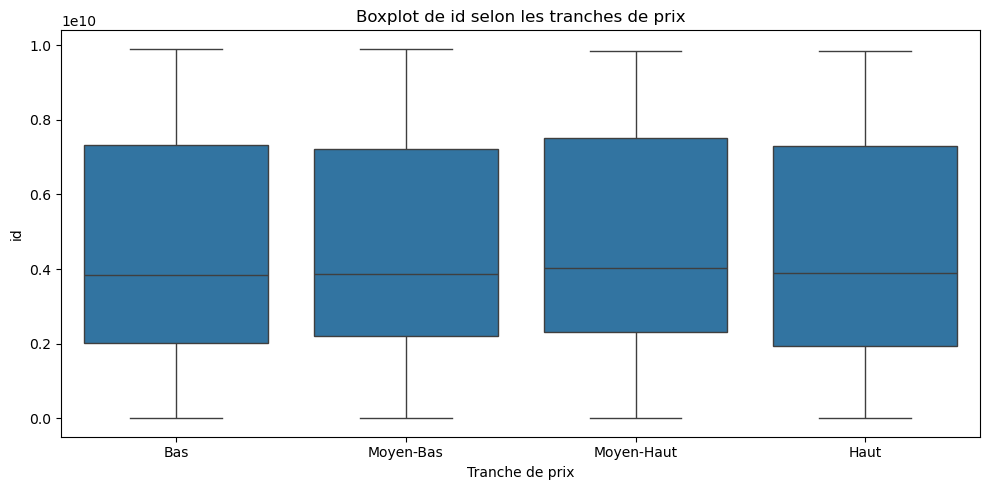

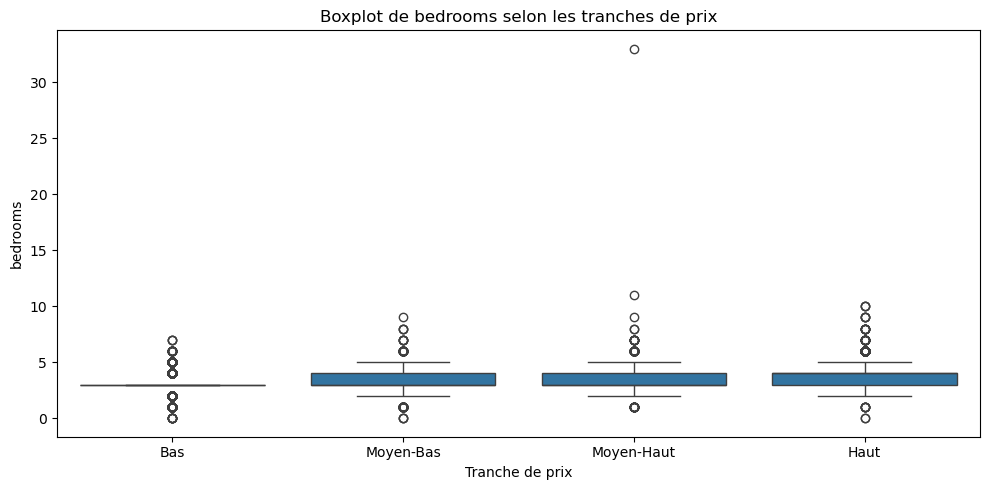

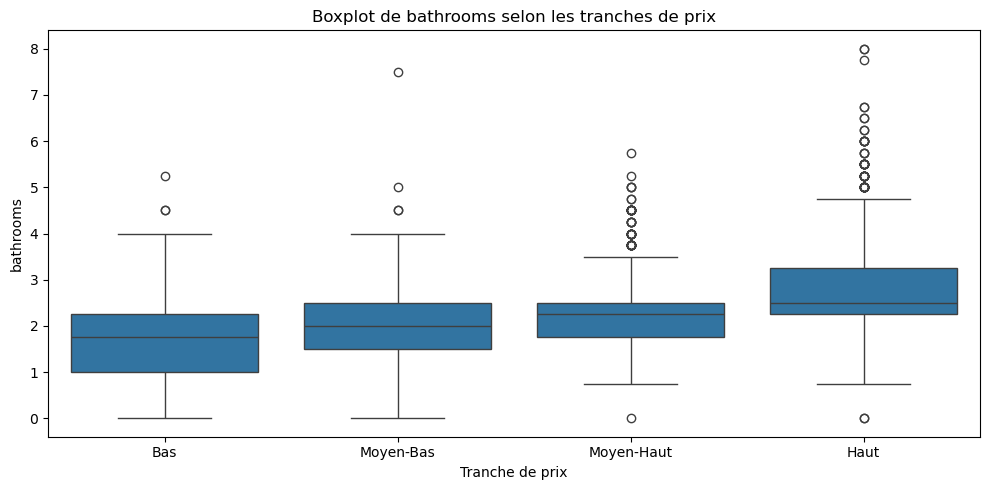

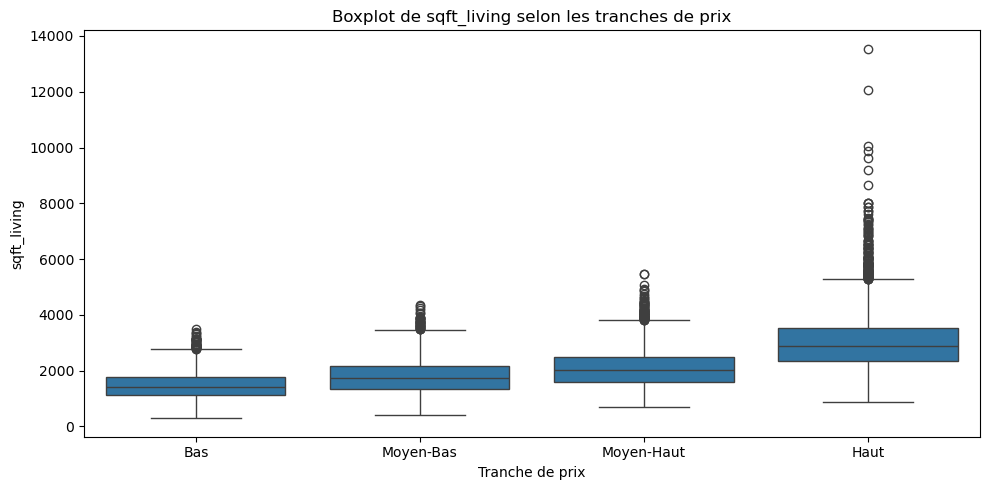

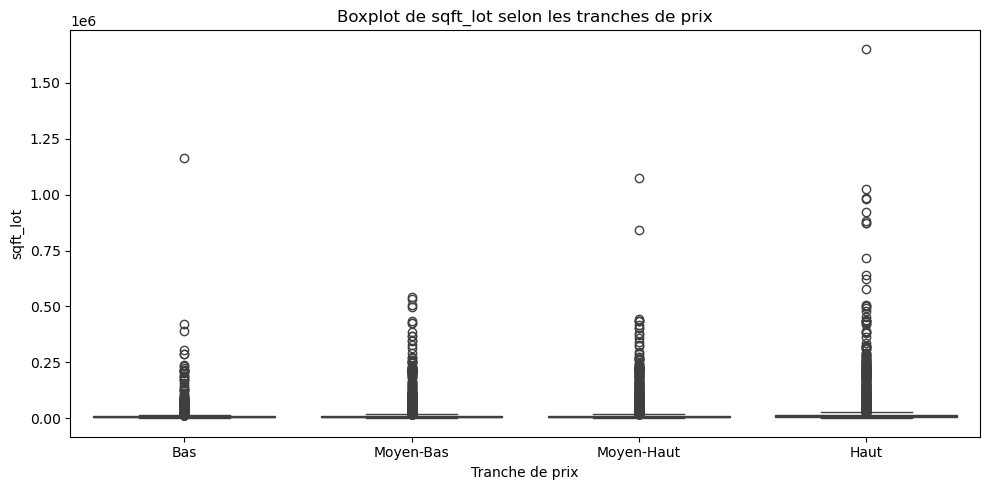

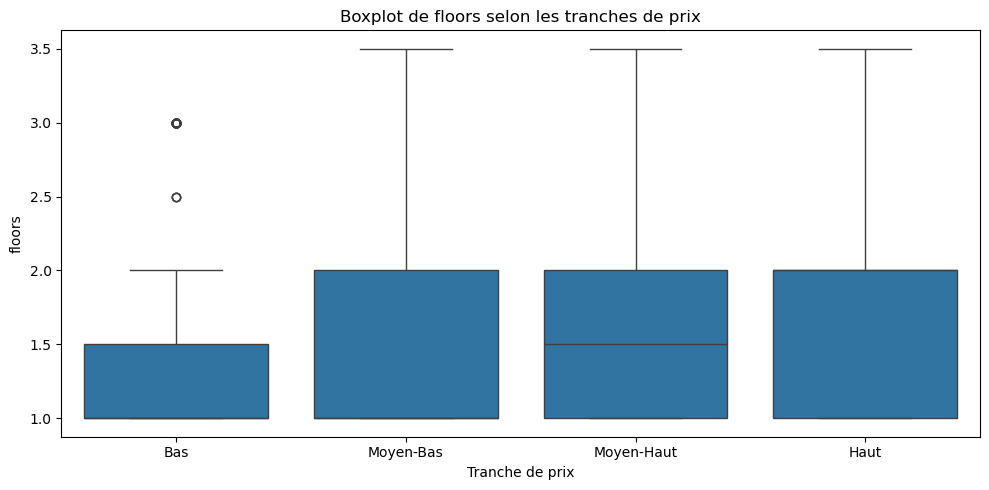

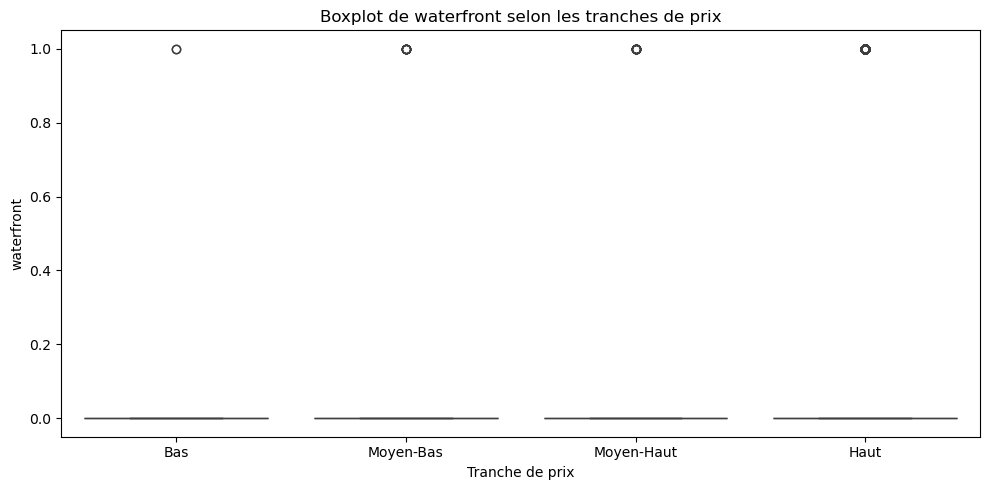

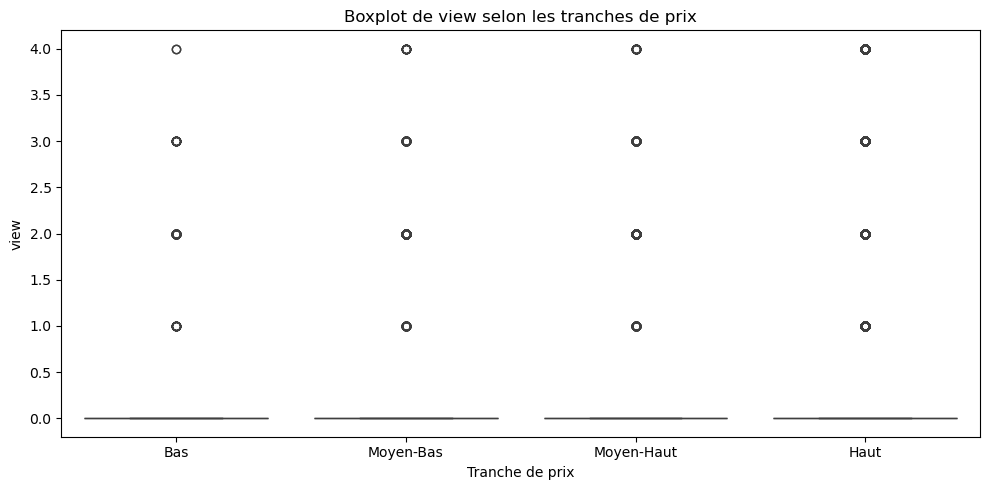

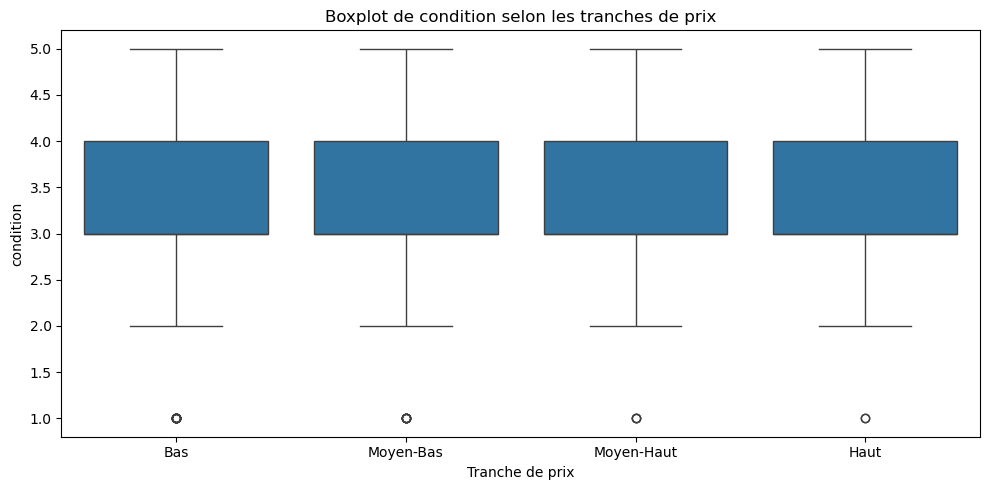

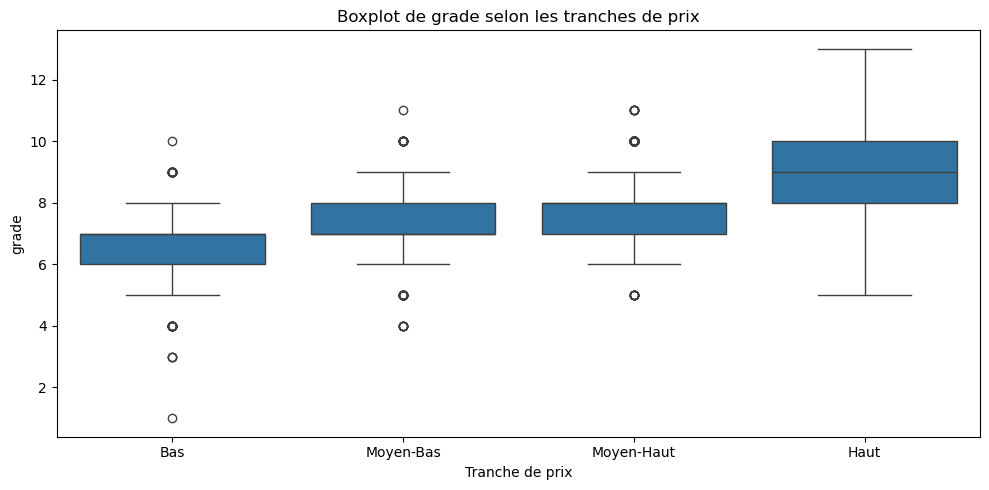

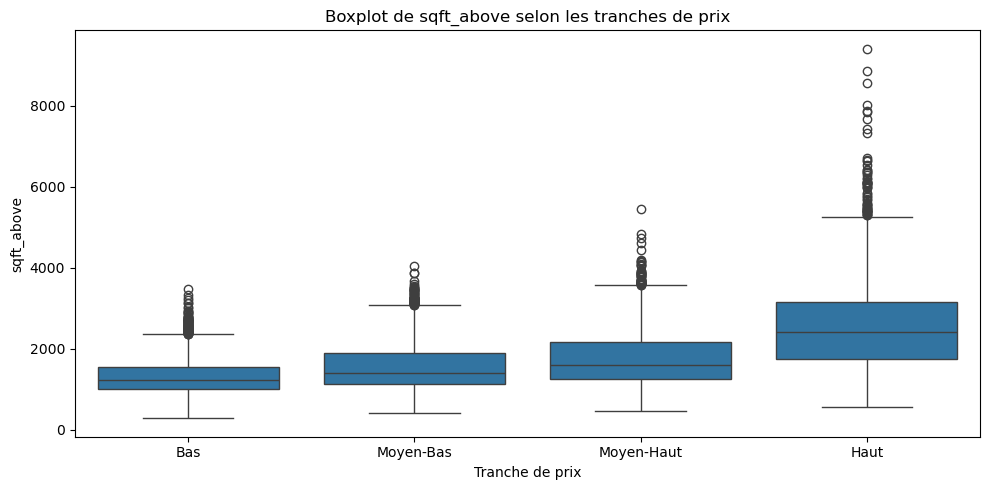

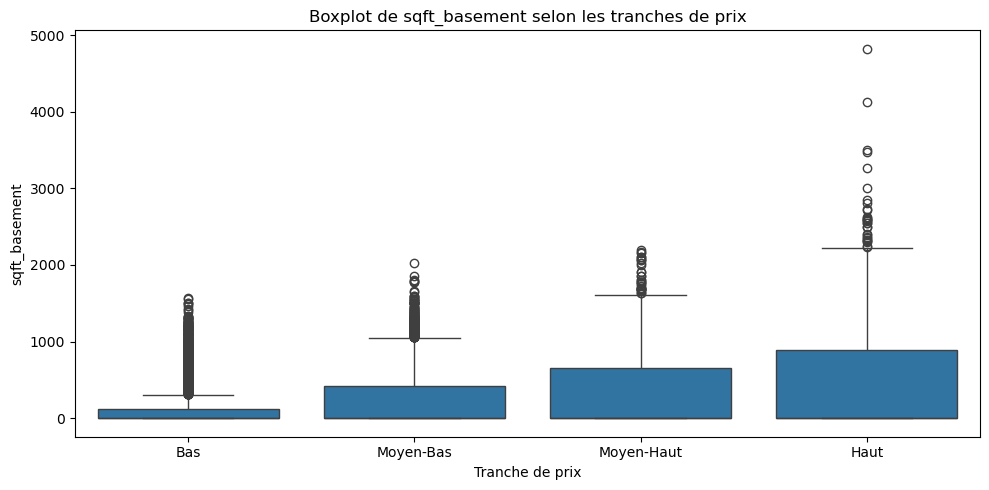

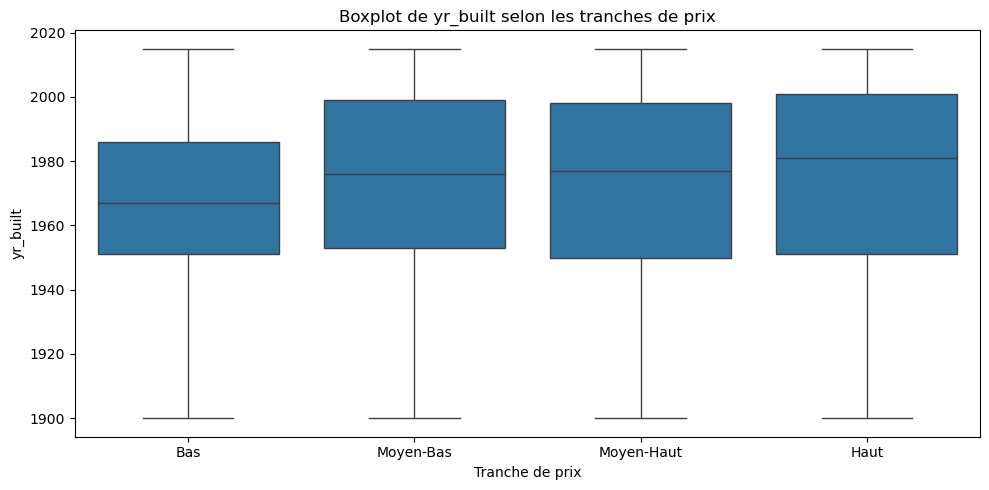

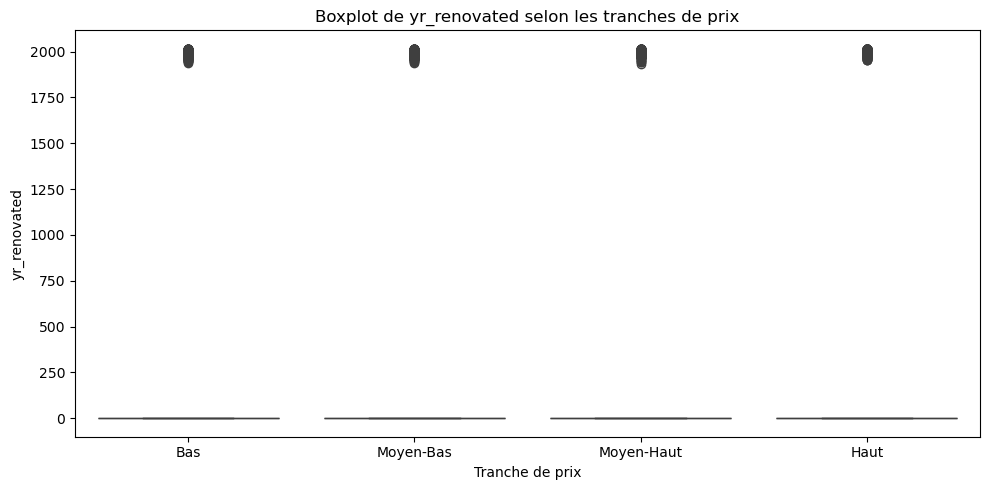

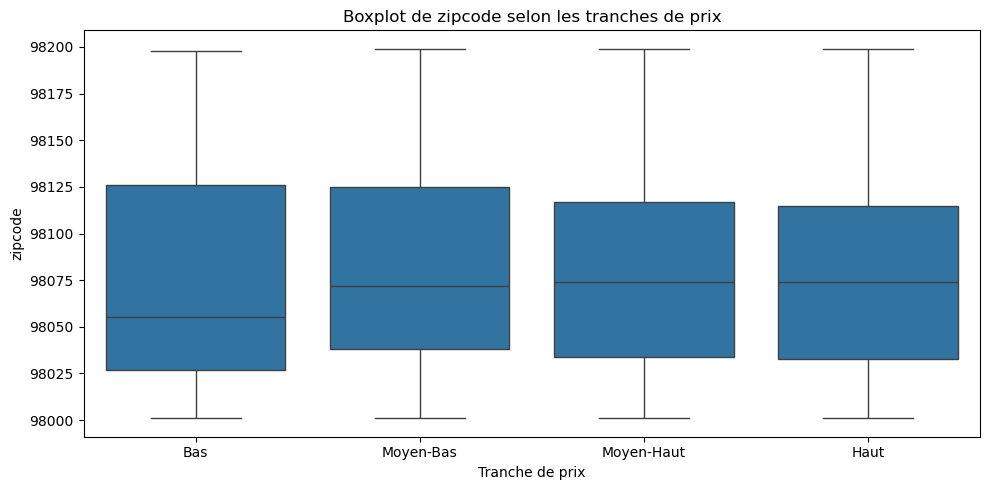

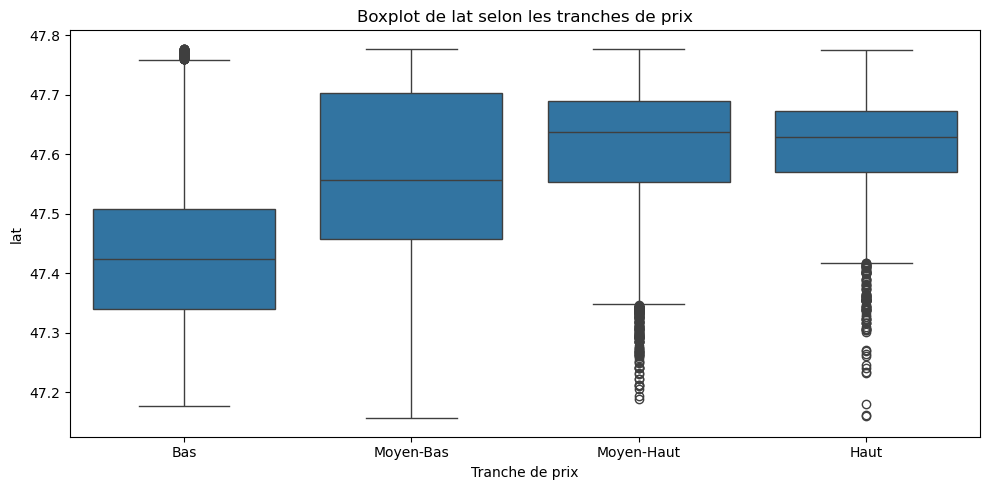

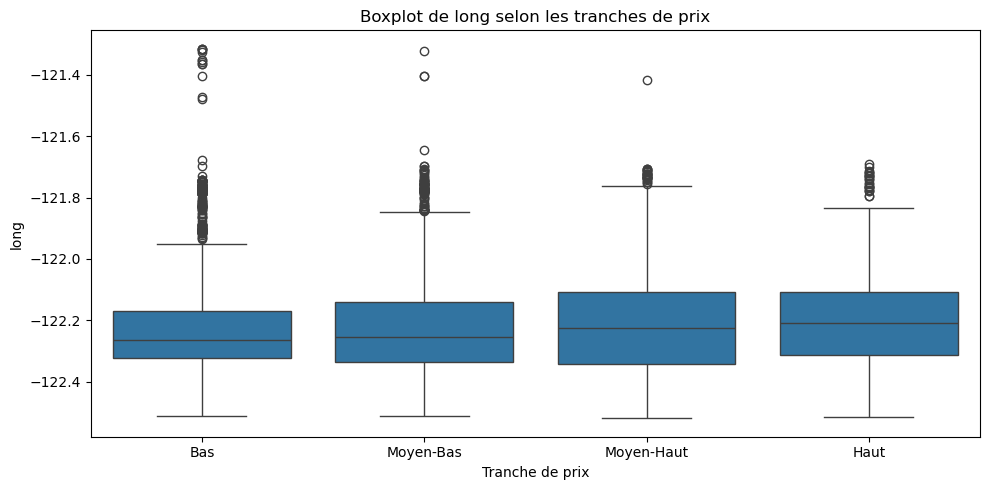

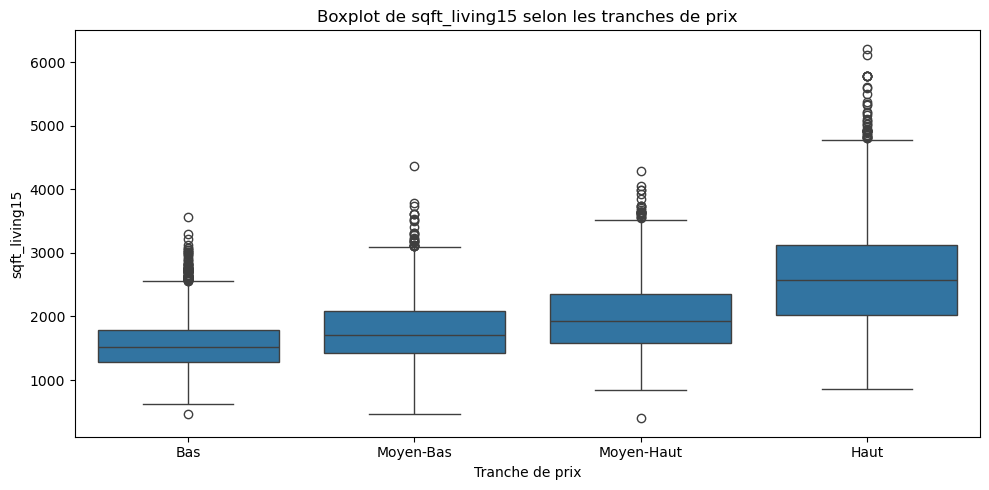

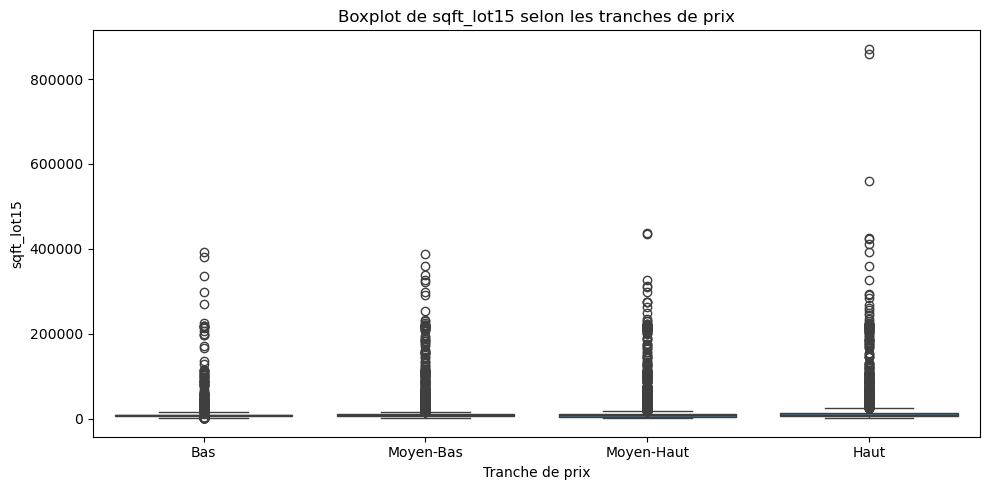

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer des tranches de prix (catégories)
df['price_range'] = pd.qcut(df['price'], q=4, labels=['Bas', 'Moyen-Bas', 'Moyen-Haut', 'Haut'])

# Tracer les boxplots par tranche de prix
for col in num_cols:
    if col != 'price':  # On évite de faire un boxplot de price par price_range
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='price_range', y=col, data=df)
        plt.title(f'Boxplot de {col} selon les tranches de prix')
        plt.xlabel('Tranche de prix')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

df= df.drop(columns=['price_range'])

#### Catégorielle vs cible catégorielle

In [337]:
for col in cat_cols:
    if col not in ['id']:
        # Créer une table croisée (distribution par catégorie + par valeur cible)
        crosstab = pd.crosstab(df[col], df['price'], normalize='index')

        # Tracer le diagramme en barres empilées
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 5))
        plt.title(f'Distribution de {col} par Price')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### 1.6. Corrélation entre variables numériques

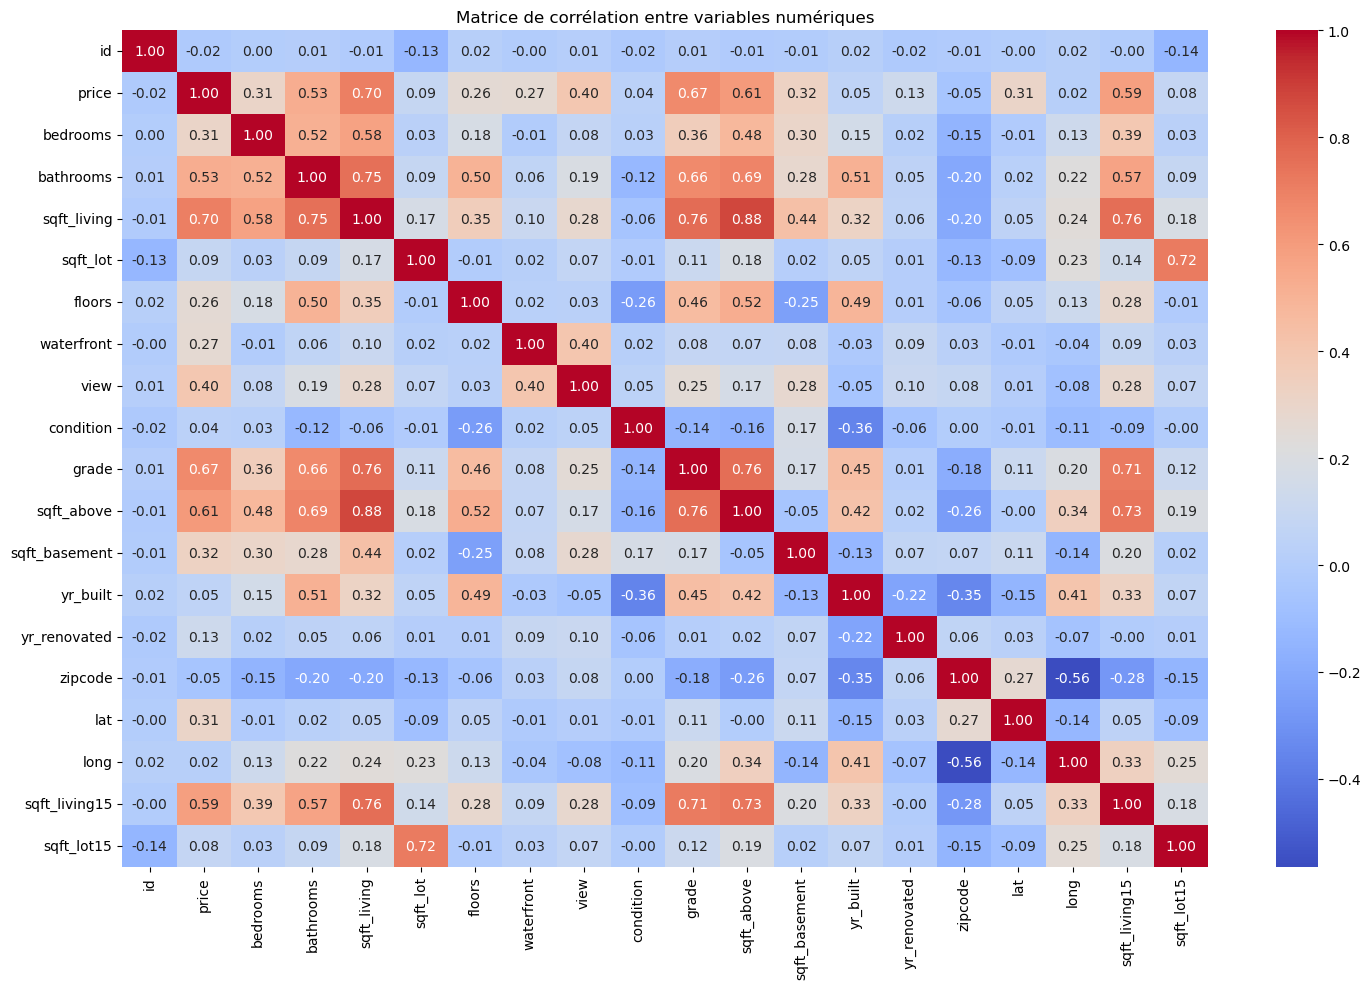

In [339]:
correlation = df[num_cols].corr()

plt.figure(figsize=(15, 10))  # Agrandit la taille de la heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre variables numériques')
plt.tight_layout()
plt.show()

### 1.7. Détection des outliers (valeurs aberrantes)

#### Graphiquement 

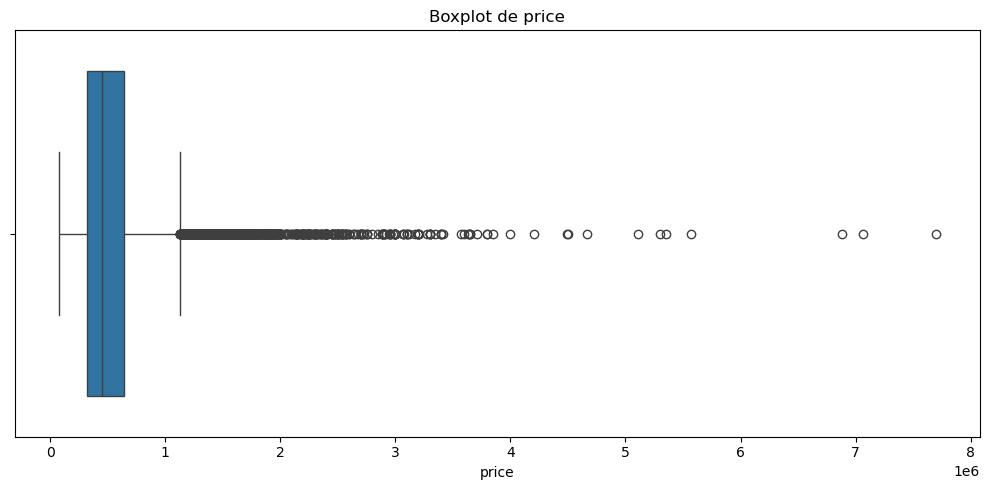

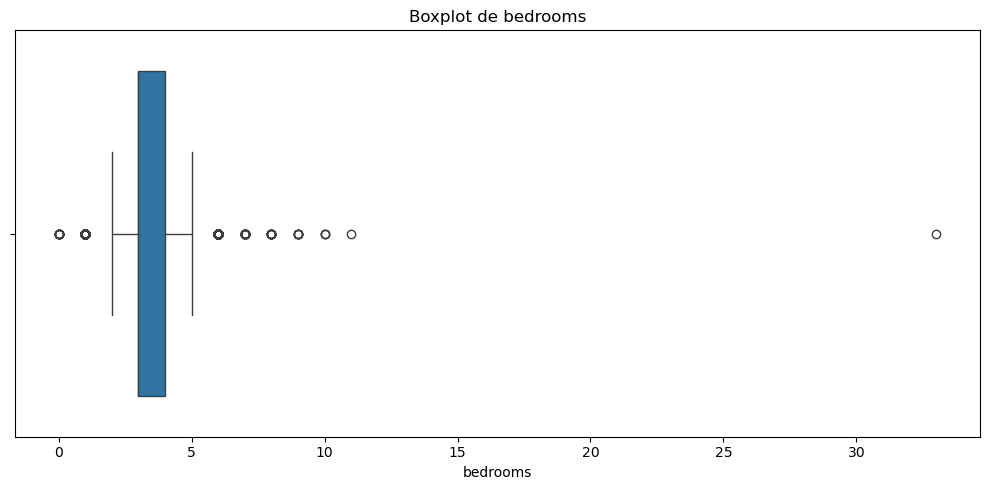

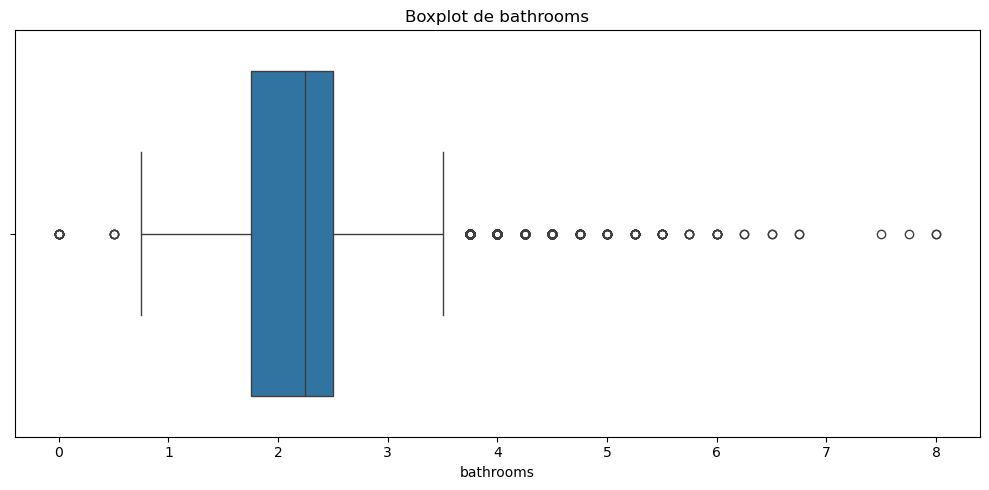

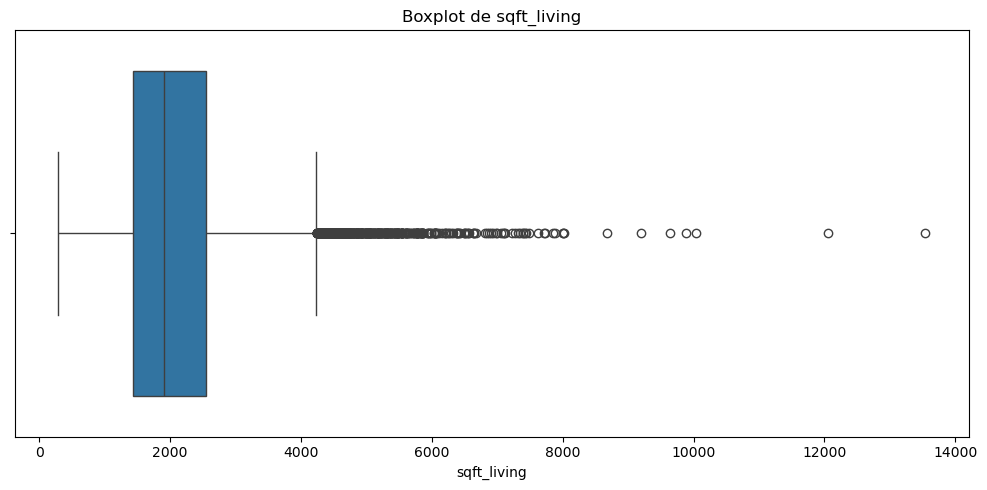

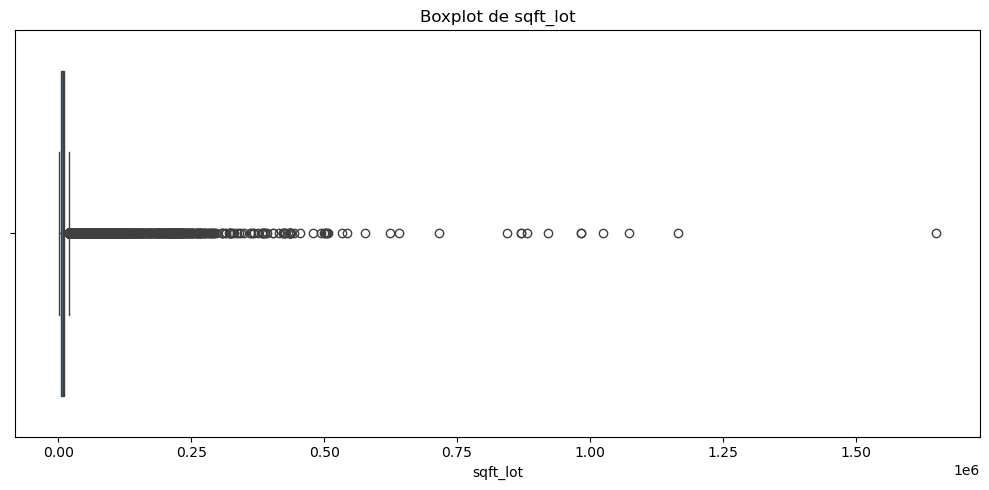

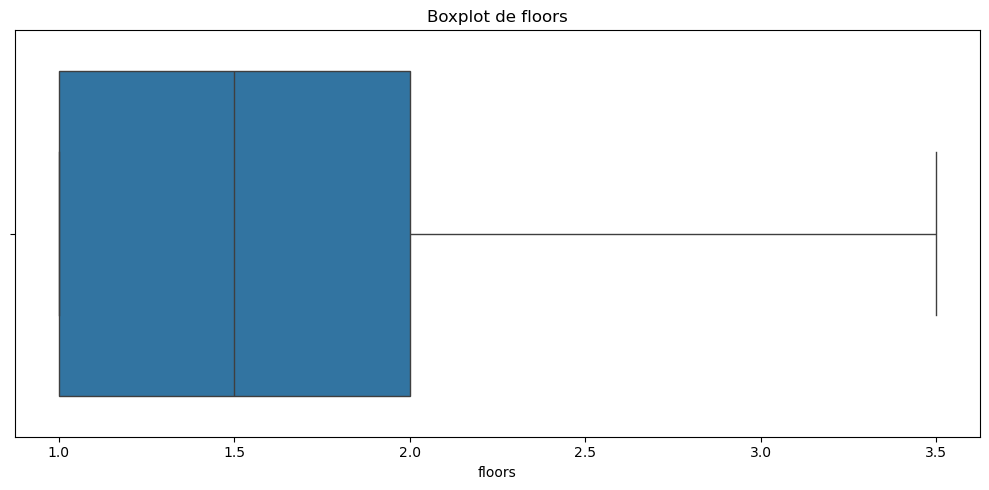

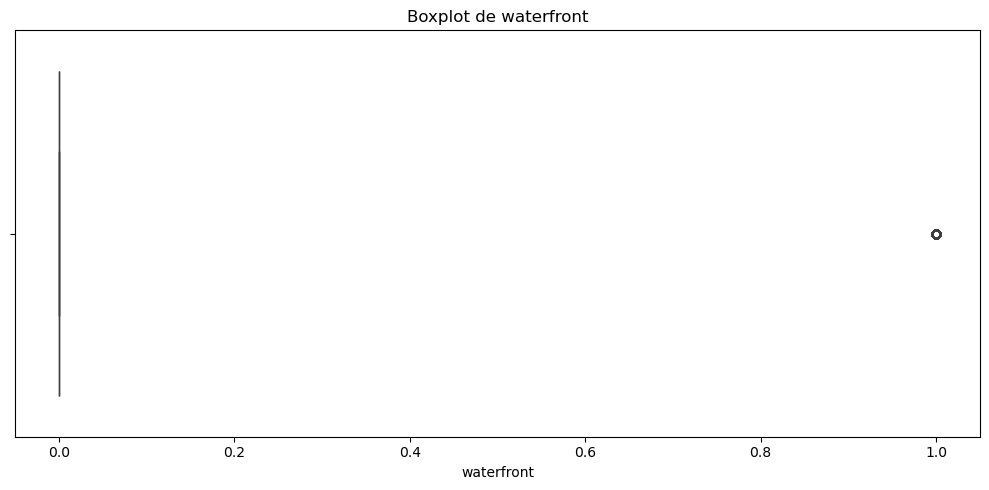

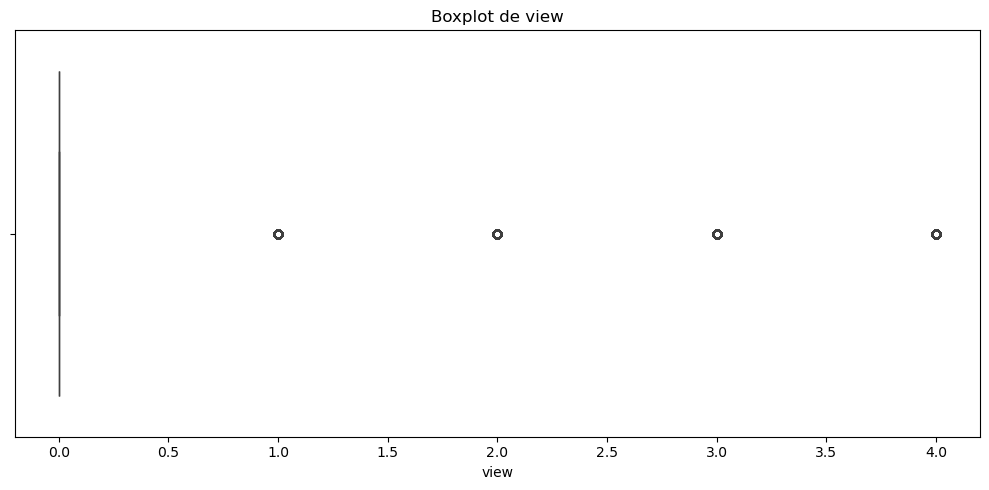

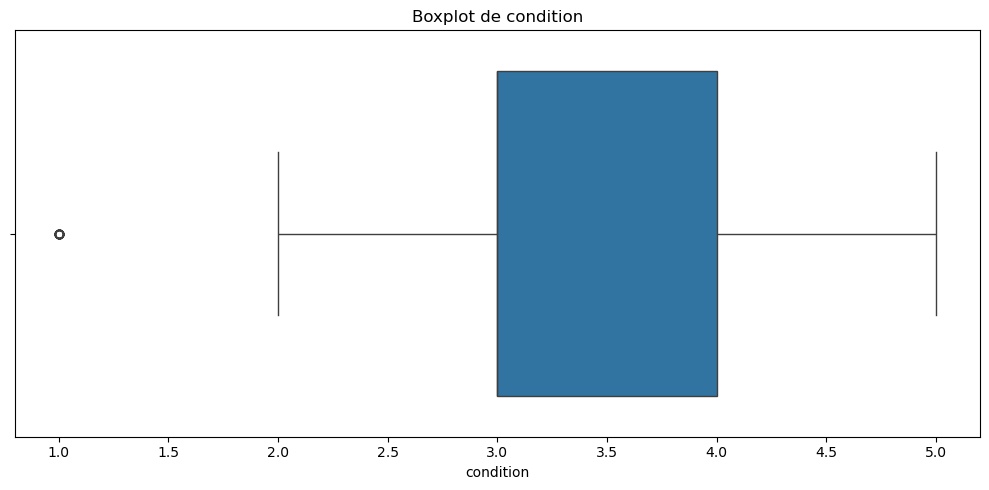

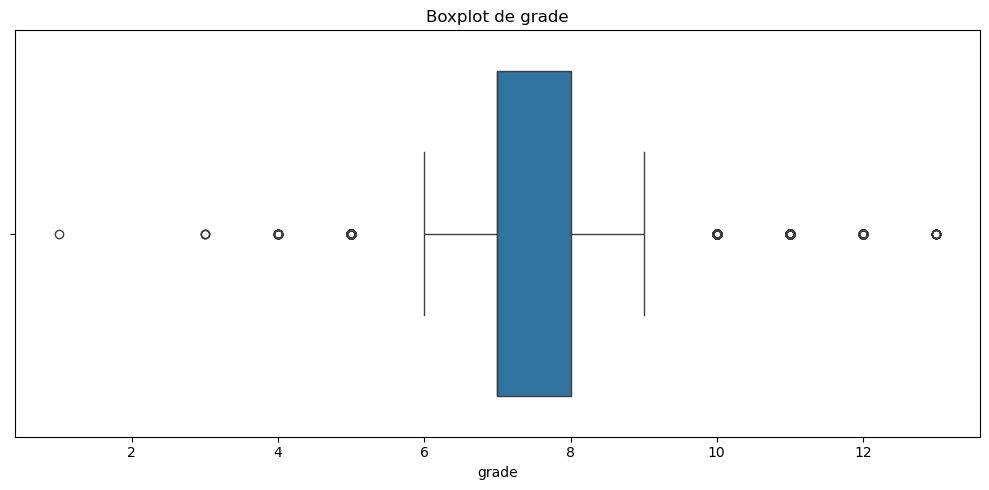

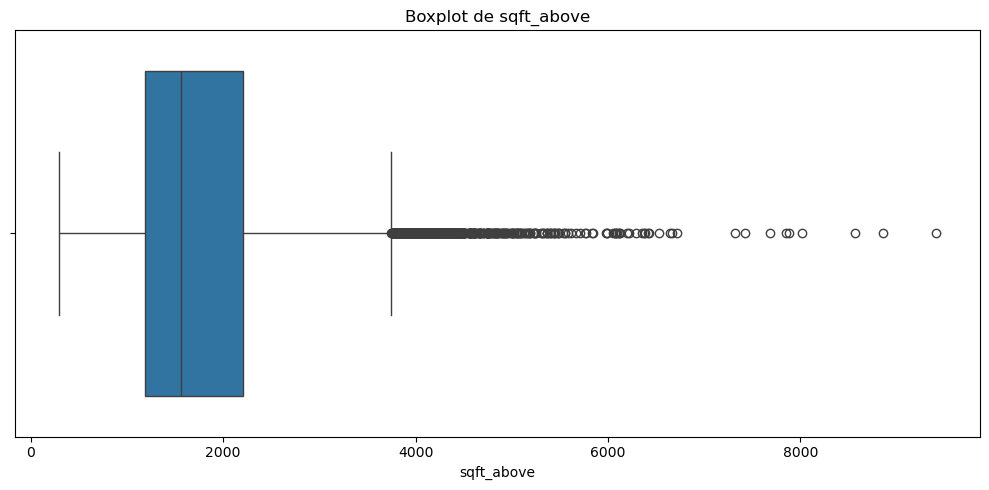

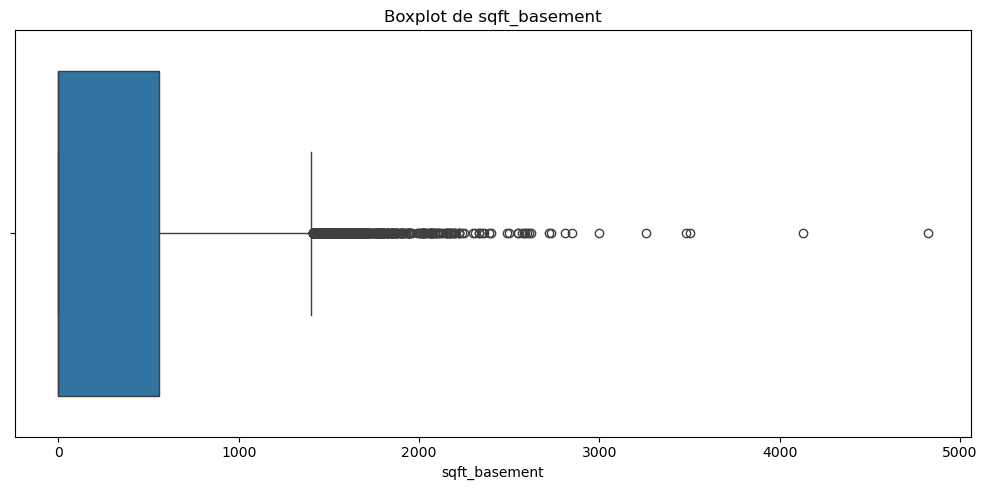

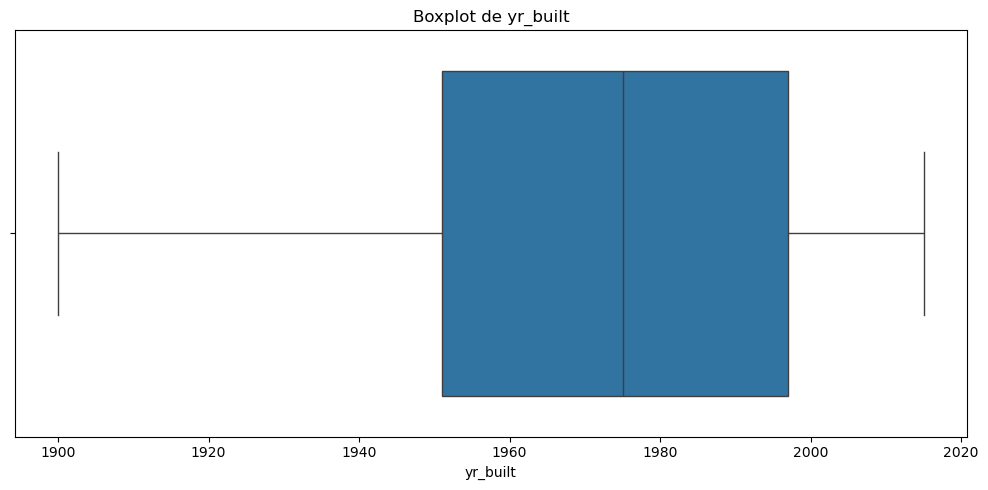

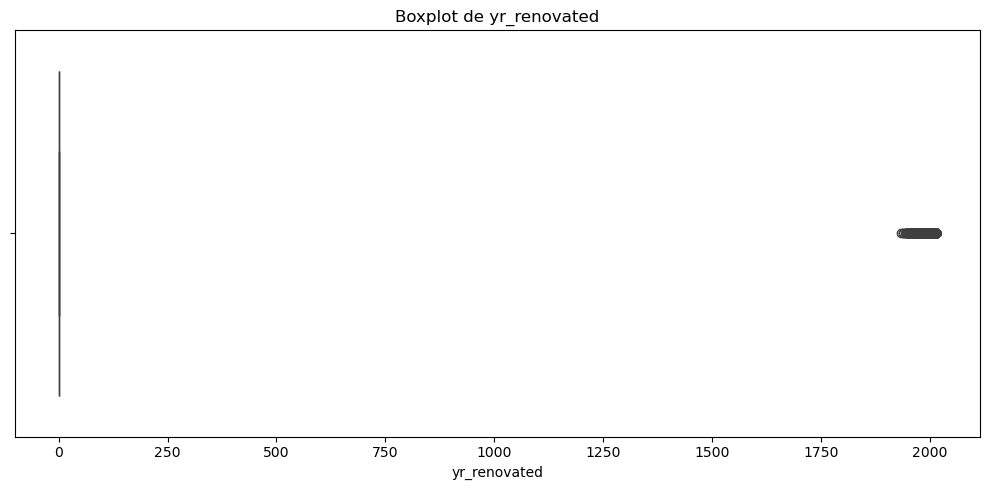

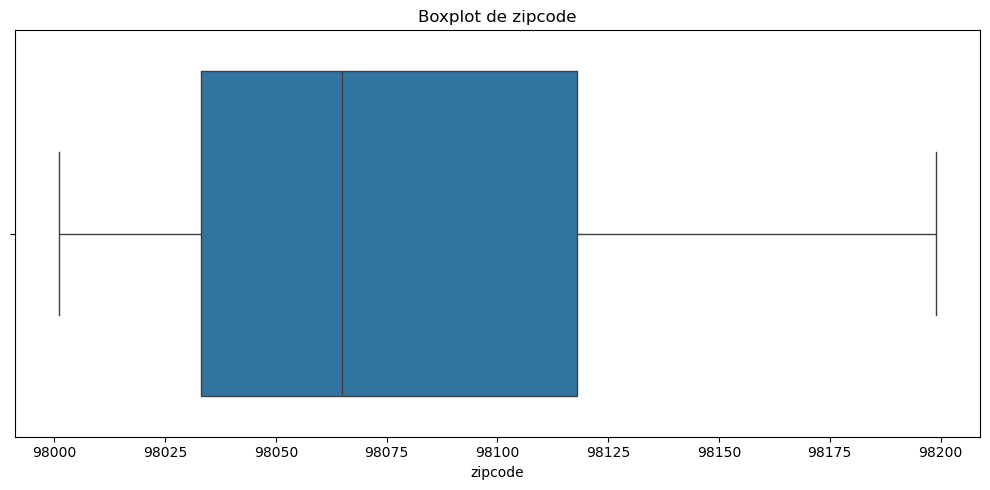

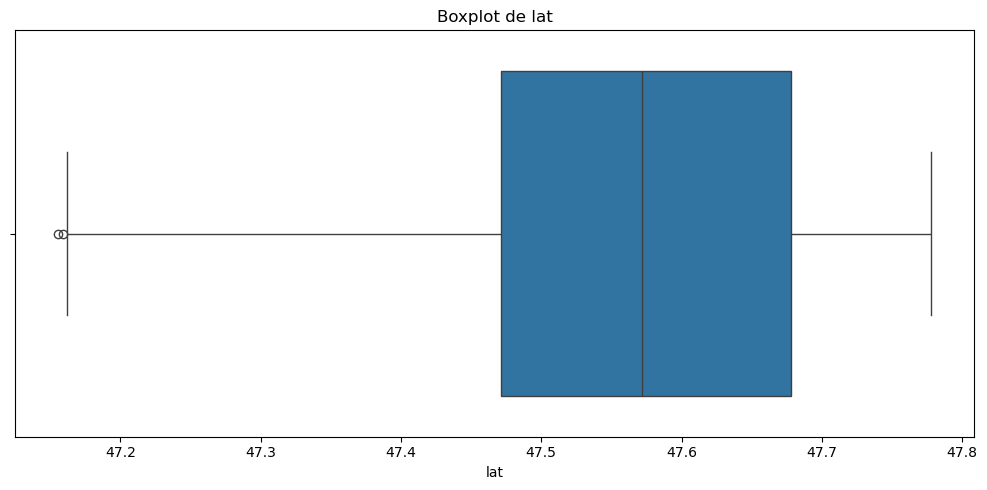

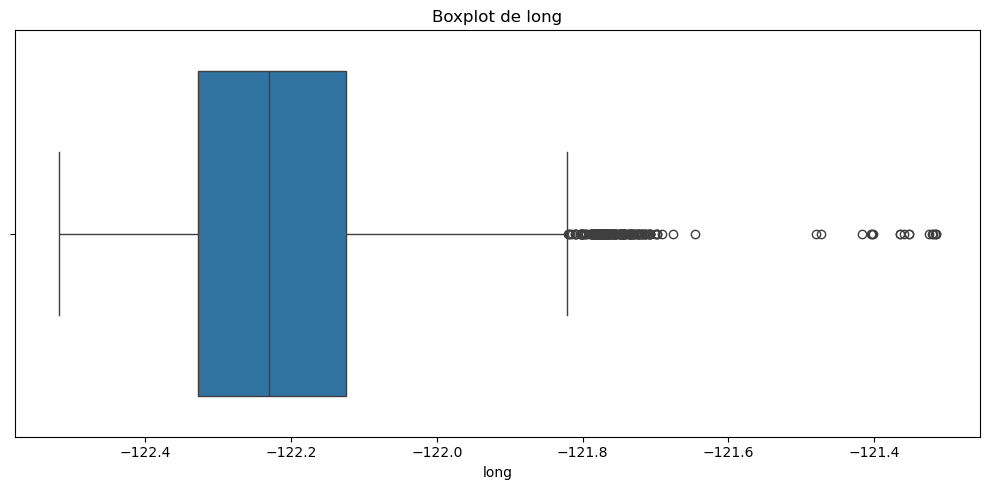

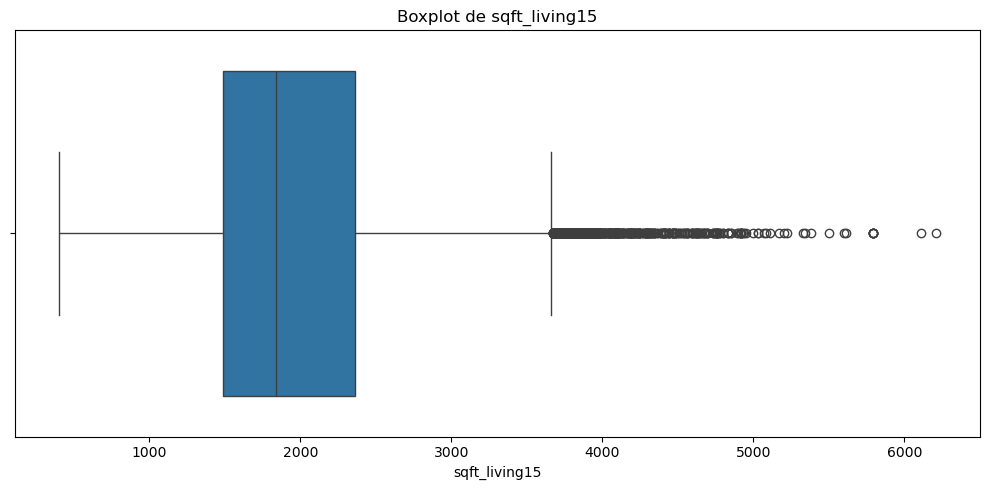

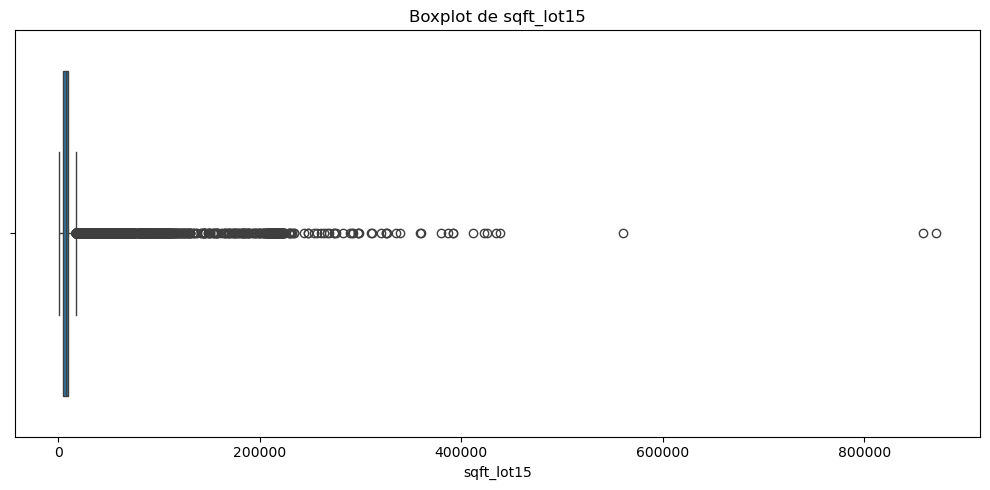

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    if col not in ['id']:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

#### IQR 

In [344]:
outliers_list = []

for col in num_cols:
    if col not in ['id']:  # pour exclure l'identifiant
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Détection des outliers
        outliers_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

        # Option : ajouter une colonne pour indiquer la variable concernée
        outliers_col = outliers_col.copy()
        outliers_col['col_outlier'] = col

        outliers_list.append(outliers_col)

# Fusionner tous les outliers détectés
outliers = pd.concat(outliers_list).drop_duplicates()

print(f'Nombre de valeurs aberrantes : {outliers.shape[0]}')

outliers


Nombre de valeurs aberrantes : 14505


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,col_outlier
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,price
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,4,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,price
49,822039084,2015-03-11,1350000.0,3,2.50,2753,65005,1.0,1,2,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,price
69,1802000060,2014-06-12,1325000.0,5,2.25,3200,20158,1.0,0,0,...,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,price
125,4389200955,2015-03-02,1450000.0,4,2.75,2750,17789,1.5,0,0,...,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275,price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,7237550100,2014-08-25,1408760.0,4,4.00,4920,50621,2.0,0,0,...,4280,640,2012,0,98053,47.6575,-122.006,4920,74052,sqft_lot15
21525,2625069038,2014-11-24,1450000.0,4,3.50,4300,108865,2.0,0,0,...,4300,0,2014,0,98074,47.6258,-122.005,4650,107498,sqft_lot15
21532,324069112,2014-06-17,1325000.0,4,4.00,4420,16526,2.0,0,0,...,4420,0,2013,0,98075,47.5914,-122.027,3510,50447,sqft_lot15
21548,8835770330,2014-08-19,1057000.0,2,1.50,2370,184231,2.0,0,0,...,2370,0,2005,0,98045,47.4543,-121.778,3860,151081,sqft_lot15


### 1.8 Détection des doublons

In [346]:
df.duplicated().sum()

0

### 1.9. Répartition de la variable cible (target)

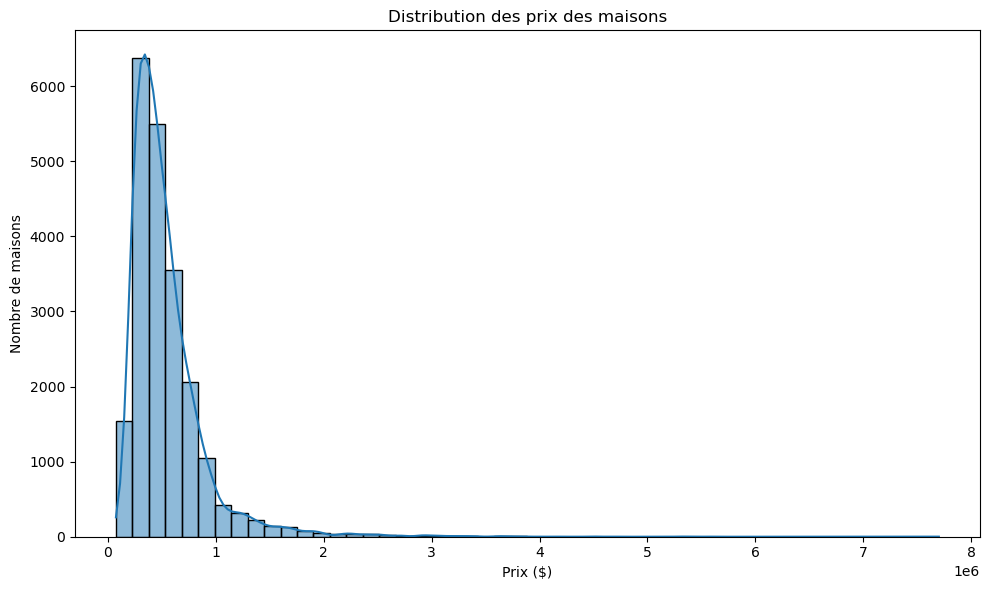

In [348]:

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution des prix des maisons")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de maisons")
plt.tight_layout()
plt.show()


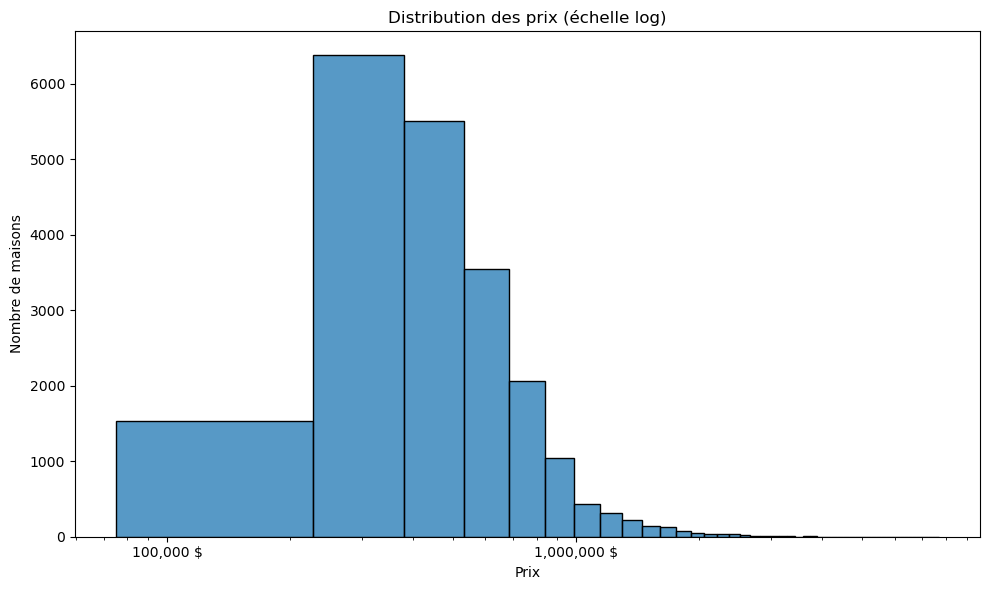

In [349]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50)
plt.xscale('log')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,} $'))
plt.title("Distribution des prix (échelle log)")
plt.xlabel("Prix")
plt.ylabel("Nombre de maisons")
plt.tight_layout()
plt.show()


# Modèles

### 2. Feature Engineering

(Pas besoin de normalisation / standardisation pour RandomForest.)

#### 2.1. Colonnes à ignorer ou supprimer

In [354]:
df = df.drop(columns=['id'])  # identifiant inutile

#### 2.2. Transformation des dates

In [356]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT000000', errors='coerce')
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df = df.drop(columns=['date'])  

#### 2.3. Colonnes numériques à garder

#### Colonnes corrélées

In [359]:
import numpy as np

# 1. Corrélation avec la variable cible
correlation_target = df.corr(numeric_only=True)['price'].abs()

# 2. Seuil minimal de corrélation avec la cible
seuil = 0.05
colonnes_corrélées = correlation_target[correlation_target > seuil].index.tolist()

# On garde toutes les colonnes corrélées, sauf 'price' (cible)
features_initiaux = [col for col in colonnes_corrélées if col != 'price']

# 3. Matrice de corrélation entre les features retenus
corr_matrix = df[features_initiaux].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Supprimer les colonnes trop corrélées entre elles (> 0.9)
colonnes_redundantes = [column for column in upper.columns if any(upper[column] > 0.9)]

# 5. Colonnes finales à garder
colonnes_finales = [col for col in features_initiaux if col not in colonnes_redundantes]

# 6. Colonnes supprimées (faiblement corrélées + redondantes)
colonnes_supprimées = [col for col in df.columns if col not in colonnes_finales and col != 'price']

# Résultats
print("Colonnes conservées pour le modèle :")
print(colonnes_finales)

print("\nColonnes supprimées (faible corrélation ou redondance) :")
print(colonnes_supprimées)


Colonnes conservées pour le modèle :
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'sqft_living15', 'sqft_lot15']

Colonnes supprimées (faible corrélation ou redondance) :
['condition', 'long', 'year_sold', 'month_sold']


In [360]:
df = df.drop(columns=colonnes_supprimées)

#### valeurs aberrantes

In [362]:
cols = ['view','grade','lat','bedrooms', 'bathrooms']
for col in cols :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filtrer les lignes sans outliers
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


#### 2.4. Colonnes catégorielles : encodage label 

In [364]:
for col in cat_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

 #### 2.5. Gestion des valeurs manquantes

In [366]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [367]:
df.to_csv('dataframe-transformée.csv', index=False)

### 3. Modèle Random Forest (sklearn)

In [369]:
# train_and_save_model.py
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np

# Chargement des données
df = pd.read_csv("kc_house_data.csv")
df.drop(["id", "date"], axis=1, inplace=True)

# Séparation X / y
X = df.drop(columns=["price"])
y = df["price"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.3f}")


MAE : 72733.63
RMSE : 148665.20
R² : 0.854


In [370]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Séparation X / y
X = df.drop(columns=['price'])
y = df['price']

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.3f}")


MAE : 72733.63
RMSE : 148665.20
R² : 0.854


####  Courbe des valeurs prédites vs réelles

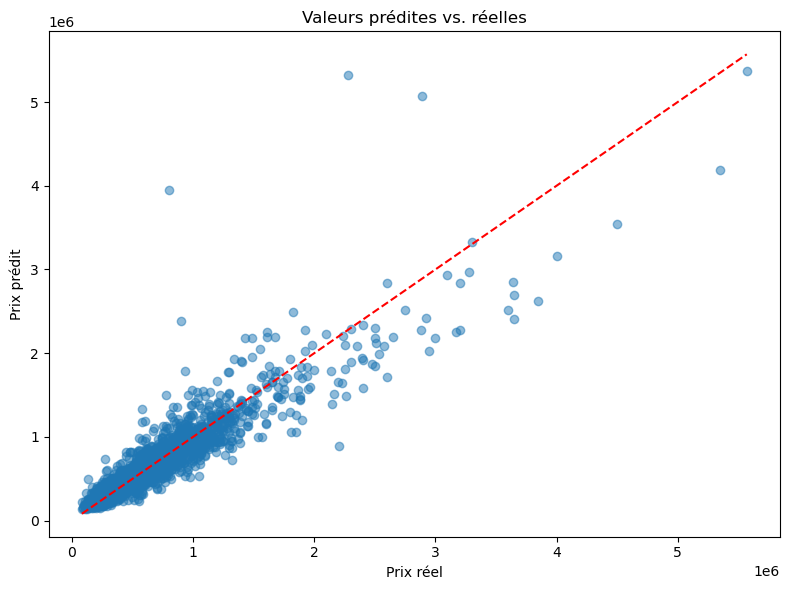

In [372]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale idéale
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Valeurs prédites vs. réelles")
plt.tight_layout()
plt.show()


#### Distribution des résidus (erreurs)

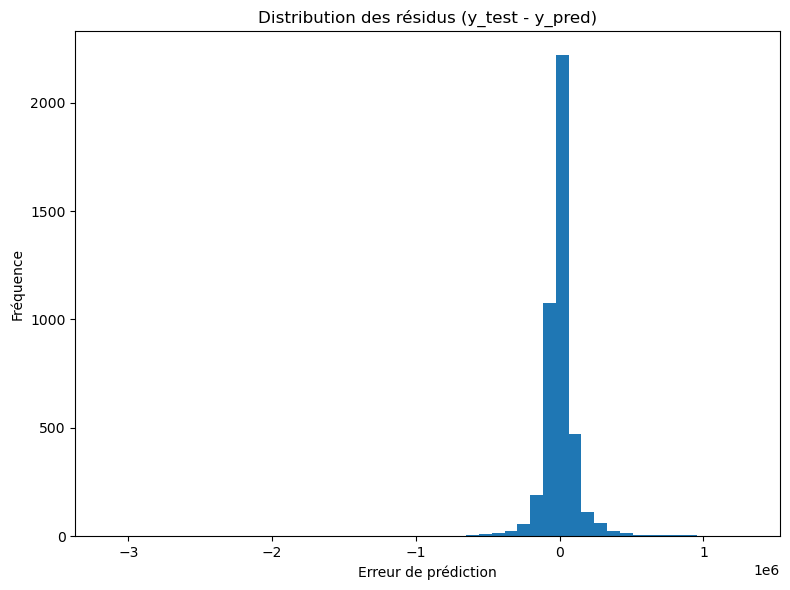

In [374]:
residus = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residus, bins=50)
plt.title("Distribution des résidus (y_test - y_pred)")
plt.xlabel("Erreur de prédiction")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()


# Modèle 2 : TabNet

In [376]:
pip install pip==23.3.1



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [377]:
pip install pytorch-tabular pytorch-lightning scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [378]:
pip install pytorch-tabular==1.0.0


  Using cached pytorch_tabular-1.0.0-py2.py3-none-any.whl.metadata (16 kB)
  Using cached category_encoders-2.5.1.post0-py2.py3-none-any.whl.metadata (7.3 kB)
  Using cached pytorch_lightning-1.8.6-py3-none-any.whl.metadata (23 kB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl.metadata (15 kB)
  Using cached protobuf-3.19.6-py2.py3-none-any.whl.metadata (828 bytes)
  Using cached pytorch_tabnet-4.0-py3-none-any.whl.metadata (14 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [67 lines of output]
      /private/var/folders/_1/_5h4z5pj76399qrw36j3h4lr0000gn/T/pip-build-env-5o0jn1bj/overlay/lib/python3.12/site-packages/setuptools/dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              *******************************

In [379]:
from pytorch_tabular.tabular_model import TabularModel
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from pytorch_tabular.models.ft_transformer.config import FTTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig
from sklearn.metrics import mean_squared_error
import numpy as np



In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pytorch_tabular.tabular_model import TabularModel
from pytorch_tabular.models.tabnet.config import TabNetModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig

# Charger les données
df = pd.read_csv("kc_house_data.csv")
df_model = df.drop(columns=["id", "date"])
target = "price"
X = df_model.drop(columns=[target])
y = df_model[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = X_train.copy()
train_data[target] = y_train
test_data = X_test.copy()
test_data[target] = y_test

# Conversion float32
for col in train_data.columns:
    if col != target:
        train_data[col] = train_data[col].astype("float32")
        test_data[col] = test_data[col].astype("float32")

# Config
data_config = DataConfig(
    target=[target],
    continuous_cols=[col for col in train_data.columns if col != target],
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
    early_stopping="valid_loss",
    early_stopping_patience=5,
    load_best=False
)

optimizer_config = OptimizerConfig()

tabnet_config = TabNetModelConfig(
    task="regression",
    metrics=["mean_squared_error"]
)

# Entraînement
tabnet_model = TabularModel(
    data_config=data_config,
    model_config=tabnet_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabnet_model.fit(train=train_data, validation=test_data)

# Prédictions
preds_tabnet = tabnet_model.predict(test_data)

if "prediction" in preds_tabnet.columns:
    y_pred = preds_tabnet["prediction"]
elif f"{target}_prediction" in preds_tabnet.columns:
    y_pred = preds_tabnet[f"{target}_prediction"]
else:
    y_pred = preds_tabnet.iloc[:, -1]

# Évaluation
rmse_tabnet = np.sqrt(mean_squared_error(test_data[target], y_pred))
mae_tabnet = mean_absolute_error(test_data[target], y_pred)
r2_tabnet = r2_score(test_data[target], y_pred)

print(f"TabNet RMSE : {rmse_tabnet:.2f}")
print(f"TabNet MAE  : {mae_tabnet:.2f}")
print(f"TabNet R²   : {r2_tabnet:.4f}")


2025-05-31 12:58:02,637 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-05-31 12:58:02,653 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-05-31 12:58:02,659 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-05-31 12:58:02,683 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabNetModel

2025-05-31 12:58:02,734 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-05-31 12:58:02,782 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 3.0199517204020163e-06
Restoring states from the checkpoint path at /Users/mariembensalah/Desktop/Deep-learning/.lr_find_842e8490-eaea-46ad-a69d-8d0b35e66fce.ckpt
Restored all states from the checkpoint at /Users/mariembensalah/Desktop/Deep-learning/.lr_find_842e8490-eaea-46ad-a69d-8d0b35e66fce.ckpt


2025-05-31 12:58:19,269 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 3.0199517204020163e-06. For   
plot and detailed analysis, use `find_learning_rate` method.

2025-05-31 12:58:19,274 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │ train │
│ 1 │ _backbone        │ TabNetBackbone │  6.8 K │ train │
│ 2 │ _head            │ Identity       │      0 │ train │
│ 3 │ loss             │ MSELoss        │      0 │ train │
└───┴──────────────────┴────────────────┴────────┴───────┘

Trainable params: 6.8 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 6.8 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 107                                                                                         
Modules in eval mode: 0

Output()

2025-05-31 12:58:36,076 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

TabNet RMSE : 673039.00
TabNet MAE  : 549367.59
TabNet R²   : -1.9964


# Modèle 3 : FTTransformer

In [382]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pytorch_tabular.tabular_model import TabularModel
from pytorch_tabular.models.ft_transformer.config import FTTransformerConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig

# Charger les données
df = pd.read_csv("kc_house_data.csv")
df_model = df.drop(columns=["id", "date"])
target = "price"
X = df_model.drop(columns=[target])
y = df_model[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = X_train.copy()
train_data[target] = y_train
test_data = X_test.copy()
test_data[target] = y_test

# Conversion float32
for col in train_data.columns:
    if col != target:
        train_data[col] = train_data[col].astype("float32")
        test_data[col] = test_data[col].astype("float32")

# Config
data_config = DataConfig(
    target=[target],
    continuous_cols=[col for col in train_data.columns if col != target],
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
    early_stopping="valid_loss",
    early_stopping_patience=5,
    load_best=False
)

optimizer_config = OptimizerConfig()

ft_config = FTTransformerConfig(
    task="regression",
    metrics=["mean_squared_error"]
)

# Entraînement
ft_model = TabularModel(
    data_config=data_config,
    model_config=ft_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

ft_model.fit(train=train_data, validation=test_data)

# Prédictions
preds_ft = ft_model.predict(test_data)

if "prediction" in preds_ft.columns:
    y_pred = preds_ft["prediction"]
elif f"{target}_prediction" in preds_ft.columns:
    y_pred = preds_ft[f"{target}_prediction"]
else:
    y_pred = preds_ft.iloc[:, -1]

# Évaluation
rmse_ft = np.sqrt(mean_squared_error(test_data[target], y_pred))
mae_ft = mean_absolute_error(test_data[target], y_pred)
r2_ft = r2_score(test_data[target], y_pred)

print(f"FTTransformer RMSE : {rmse_ft:.2f}")
print(f"FTTransformer MAE  : {mae_ft:.2f}")
print(f"FTTransformer R²   : {r2_ft:.4f}")


2025-05-31 12:58:36,317 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-05-31 12:58:36,332 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-05-31 12:58:36,336 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-05-31 12:58:36,363 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: FTTransformerModel

2025-05-31 12:58:36,391 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-05-31 12:58:36,411 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 7.585775750291837e-08
Restoring states from the checkpoint path at /Users/mariembensalah/Desktop/Deep-learning/.lr_find_26016c2d-31ce-47be-93d1-7f8df4bbb9f4.ckpt
Restored all states from the checkpoint at /Users/mariembensalah/Desktop/Deep-learning/.lr_find_26016c2d-31ce-47be-93d1-7f8df4bbb9f4.ckpt


2025-05-31 12:59:57,242 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 7.585775750291837e-08. For    
plot and detailed analysis, use `find_learning_rate` method.

2025-05-31 12:59:57,526 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  1.2 K │ train │
│ 2 │ _head            │ LinearHead            │     33 │ train │
│ 3 │ loss             │ MSELoss               │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 272 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 272 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 122                                                                                         
Modules in eval mode: 0

Output()

2025-05-31 13:01:53,047 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

FTTransformer RMSE : 673038.36
FTTransformer MAE  : 549366.81
FTTransformer R²   : -1.9964


In [383]:
# app.py
import streamlit as st
import pandas as pd
import joblib
from dotenv import load_dotenv
load_dotenv()

# Chargement du modèle Random Forest sauvegardé
@st.cache_resource
def load_model():
    return joblib.load("random_forest_model.joblib")

model = load_model()

# Chargement des données pour affichage
@st.cache_data
def load_data():
    df = pd.read_csv("kc_house_data.csv")
    return df

df = load_data()

# Interface
st.title("🏠 Prédiction du Prix de Maison - King County")
st.markdown("Explorez les données et prédisez le prix d'une maison grâce à un modèle Random Forest.")

tabs = st.tabs(["📊 Exploration des données", "🤖 Prédiction"])

# Onglet Exploration
with tabs[0]:
    st.subheader("Aperçu des données")
    st.dataframe(df.head())

    st.subheader("Statistiques")
    st.dataframe(df.describe())

# Onglet Prédiction
with tabs[1]:
    st.subheader("Entrez les caractéristiques")

    input_cols = [col for col in df.columns if col not in ["id", "date", "price"]]
    user_input = {}

    for col in input_cols:
        val = df[col].median()
        user_input[col] = st.number_input(col, value=float(val))

    if st.button("🎯 Prédire le prix"):
        input_df = pd.DataFrame([user_input])
        prediction = model.predict(input_df)[0]
        st.success(f"🏷️ Prix estimé : {prediction:,.0f} $")


2025-05-31 13:01:57.546 No runtime found, using MemoryCacheStorageManager


In [384]:
# 8. Comparaison des modèles
results = {
    "RandomForest": {"model": model, "R2": r2},
    "TabNet": {"model": tabnet_model, "R2": r2_tabnet},
    "FTTransformer": {"model": ft_model, "R2": r2_ft},
}

# Sélection du meilleur modèle basé sur R²
best_model_name = max(results, key=lambda k: results[k]["R2"])
best_model = results[best_model_name]["model"]

print(f"\n Meilleur modèle : {best_model_name} avec R² = {results[best_model_name]['R2']:.4f}")

# 9. Sauvegarde
joblib.dump(best_model, "random_forest_model.joblib")
print("Modèle sauvegardé sous 'random_forest_model.joblib'")



 Meilleur modèle : RandomForest avec R² = 0.8538
Modèle sauvegardé sous 'random_forest_model.joblib'
